# Tutorial1 pCO2 time series analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

## Define path to the data storage (depends on your system)

In [2]:
dir5='/glade/campaign/univ/ugit0018/rso/ecoDrake.64t.5km.100lev/'
dir10='/glade/p/univ/ugit0016/rso/ecoDrake.64t.10km.42lev/ver8/'
diro='/glade/work/ito/dataset/ocean/'

## assemble observational pCO2 time series (6 products from Seaflux)

In [3]:
# SeaFlux
do=xr.open_dataset(diro+'SeaFlux/SeaFlux_v2021.04_spco2_SOCOM_unfilled_1982-2019.nc')
pco2o=do.sel(time=slice("2008-01-01","2012-12-31"))
plab=['JENA_MLS','MPI_SOMFFN','CMEMS_FFNN','CSIR_ML6','JMA_MLR','NIES_FNN']

In [4]:
obs=np.empty((60,6))
for i in range(0,6):
    pr=plab[i]
    tmp=pco2o[pr].sel(lon=slice(-70,-60)).sel(lat=slice(-63,-57)).mean(('lon','lat'))
    timeo=pco2o['time']
    obs[:,i]=tmp.to_numpy()

## assemble 10km result

In [5]:
ds10=xr.open_dataset(dir10+'pco2.nc')
pco2=ds10.pco2.sel(lon=slice(290,300)).sel(lat=slice(-63,-57))
pco2ts10=pco2.isel(time=slice(360,720)).mean(('lon','lat')).to_numpy()

In [6]:
time=np.linspace(2008,2013-1/72,360)
timeo2=np.linspace(2008,2013-1/12,60)

## 5km result

In [7]:
ds5=xr.open_dataset(dir5+'PCO2.nc')
pco2ts5=ds5.pco2.mean(('lon','lat')).to_numpy()

## plot everything together

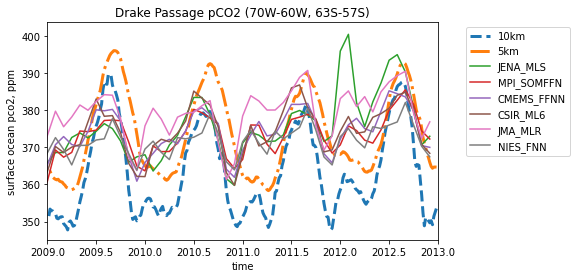

In [8]:
obsm=np.mean(obs,1)
fig=plt.figure(figsize=(7,4))
plt.plot(time,pco2ts10*1e6,'--',label='10km',linewidth=3)
plt.plot(time,pco2ts5*1e6,'-.',label='5km',linewidth=3)
plt.plot(timeo2,obs,label=plab)
plt.legend(bbox_to_anchor=(.85,.5,.5,.5))
plt.xlabel('time')
plt.xlim(2009,2013)
plt.title('Drake Passage pCO2 (70W-60W, 63S-57S)')
plt.ylabel('surface ocean pco2, ppm')
plt.savefig('pco2_timeseries.pdf',bbox_inches="tight")
plt.show()